In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import imutils
import cv2
import os

In [43]:
face_paths = list(paths.list_images("./datasets/"))

In [44]:
images = []
labels = []
for face_path in face_paths:
    image = cv2.imread(face_path, 0)
    image = cv2.resize(image,(200, 200))
    images.append(image)
    labels.append(face_path.split(os.path.sep)[-2].split('/')[-1])

In [45]:
le = LabelEncoder()
labels = le.fit_transform(labels)
images = np.array(images)

In [49]:
le.classes_

array(['Garnett', 'James', 'Kobe'], dtype='<U7')

In [66]:
eigen_face = cv2.face.EigenFaceRecognizer_create()
eigen_face.train(images, labels)

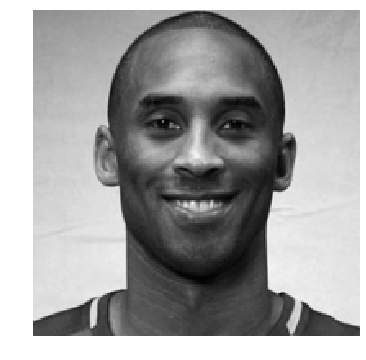

In [67]:
test_image = cv2.imread("./datasets/test.png", 0)
test_image = cv2.resize(test_image, (200, 200))
plt.figure(figsize=(6, 6))
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()

In [69]:
label = le.classes_[eigen_face.predict(test_image)[0]]
label

'Kobe'